In [37]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [38]:
df=pd.read_csv(r'C:\Users\user\Downloads\Company_Data.csv')
print(df.shape)

(400, 11)


In [39]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [40]:
#cheaking for missing dataset
NAs=pd.concat([df.isnull().sum()],axis=1,keys=['Train'])
NAs[NAs.sum(axis=1)>0]

,Train


In [41]:
df["SALES"] = pd.cut(df["Sales"], bins = [4,8,12], labels = ["Risky", "Good"])

In [42]:
print(df)

     Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US  SALES  
0   

In [43]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,SALES
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,Good
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,Good
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,Good
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Risky
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Risky
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,NaN
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,Risky
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,Risky
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,Risky


In [44]:
#Getting Dummies for all other categorical vars
for col in df.dtypes[df.dtypes=="object"].index:
    for_dummy=df.pop(col)
    df=pd.concat([df,pd.get_dummies(for_dummy,prefix=col)],axis=1)
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,SALES,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,Good,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,Good,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,Good,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,Risky,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,Risky,1,0,0,0,1,1,0


In [45]:
df = pd.get_dummies(df,columns = ["SALES"],drop_first=True)

In [46]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,SALES_Good
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1,0
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0,0


In [47]:
labels=df.pop("SALES_Good")

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df,labels,test_size=0.25)

In [51]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [52]:
y_pred=rf.predict(x_test)

In [53]:
from sklearn.metrics import roc_curve,auc
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,y_pred)
roc_auc=auc(false_positive_rate,true_positive_rate)
roc_auc

1.0

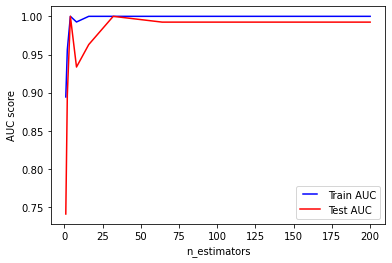

In [54]:
n_estimators=[1,2,4,8,16,32,64,100,200]
train_results=[]
test_results=[]

for estimators in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimators,n_jobs=1)
    rf.fit(x_train,y_train)
    train_pred = rf.predict(x_train)
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_train,train_pred)
    roc_auc = auc(false_positive_rate,true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(x_test)
    false_positive_rate,true_positive_rate,thresholds = roc_curve(y_test,y_pred)
    roc_auc = auc(false_positive_rate,true_positive_rate)
    test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators,train_results,"b",label="Train AUC")
line2, = plt.plot(n_estimators,test_results,"r",label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("n_estimators")
plt.show()
    
    
    